In [1]:

import pandas as pd
import numpy as np
import datetime
from pyspark.sql import SparkSession
import os

import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow

from sklearn.feature_extraction import img_to_graph

import skimage

import scipy

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Inspect LITS dataset

In [2]:
ret = []
with open('lits_fold_0.txt', 'r') as data:
    for i in data:
        i = i.removesuffix('.png\n')
        i = i.removesuffix('.png')
        i = i.removeprefix('p')
        ret.append(i.split('slice'))

df = pd.DataFrame(ret, columns=['patient', 'slice'])
df.value_counts('patient')

patient
105    80
93     78
104    64
110    63
115    62
88     59
113    57
35     39
125    38
42     38
69     32
40     30
67     26
72     20
78     20
79     20
61     20
46     14
71     12
77     12
dtype: int64

In [3]:
ret = []
for i in os.listdir('LITS/Processed'):
    i = i.removesuffix('.png\n')
    i = i.removesuffix('.png')
    i = i.removeprefix('p')
    ret.append(i.split('slice'))

df_large = pd.DataFrame(ret, columns=['patient', 'slice'])
df_large.value_counts('patient').sort_values()

df_large['patient'] = df_large['patient'].map(lambda x: int(x))


In [4]:


piv = df_large.iloc[np.argsort(df_large['patient'])[::-1]].pivot_table(values=['slice'], index=['patient'], aggfunc='count')

piv

,slice
patient,
28,33
29,38
30,41
31,22
32,40
...,...
126,37
127,76
128,97


In [5]:
piv.shape

(103, 1)

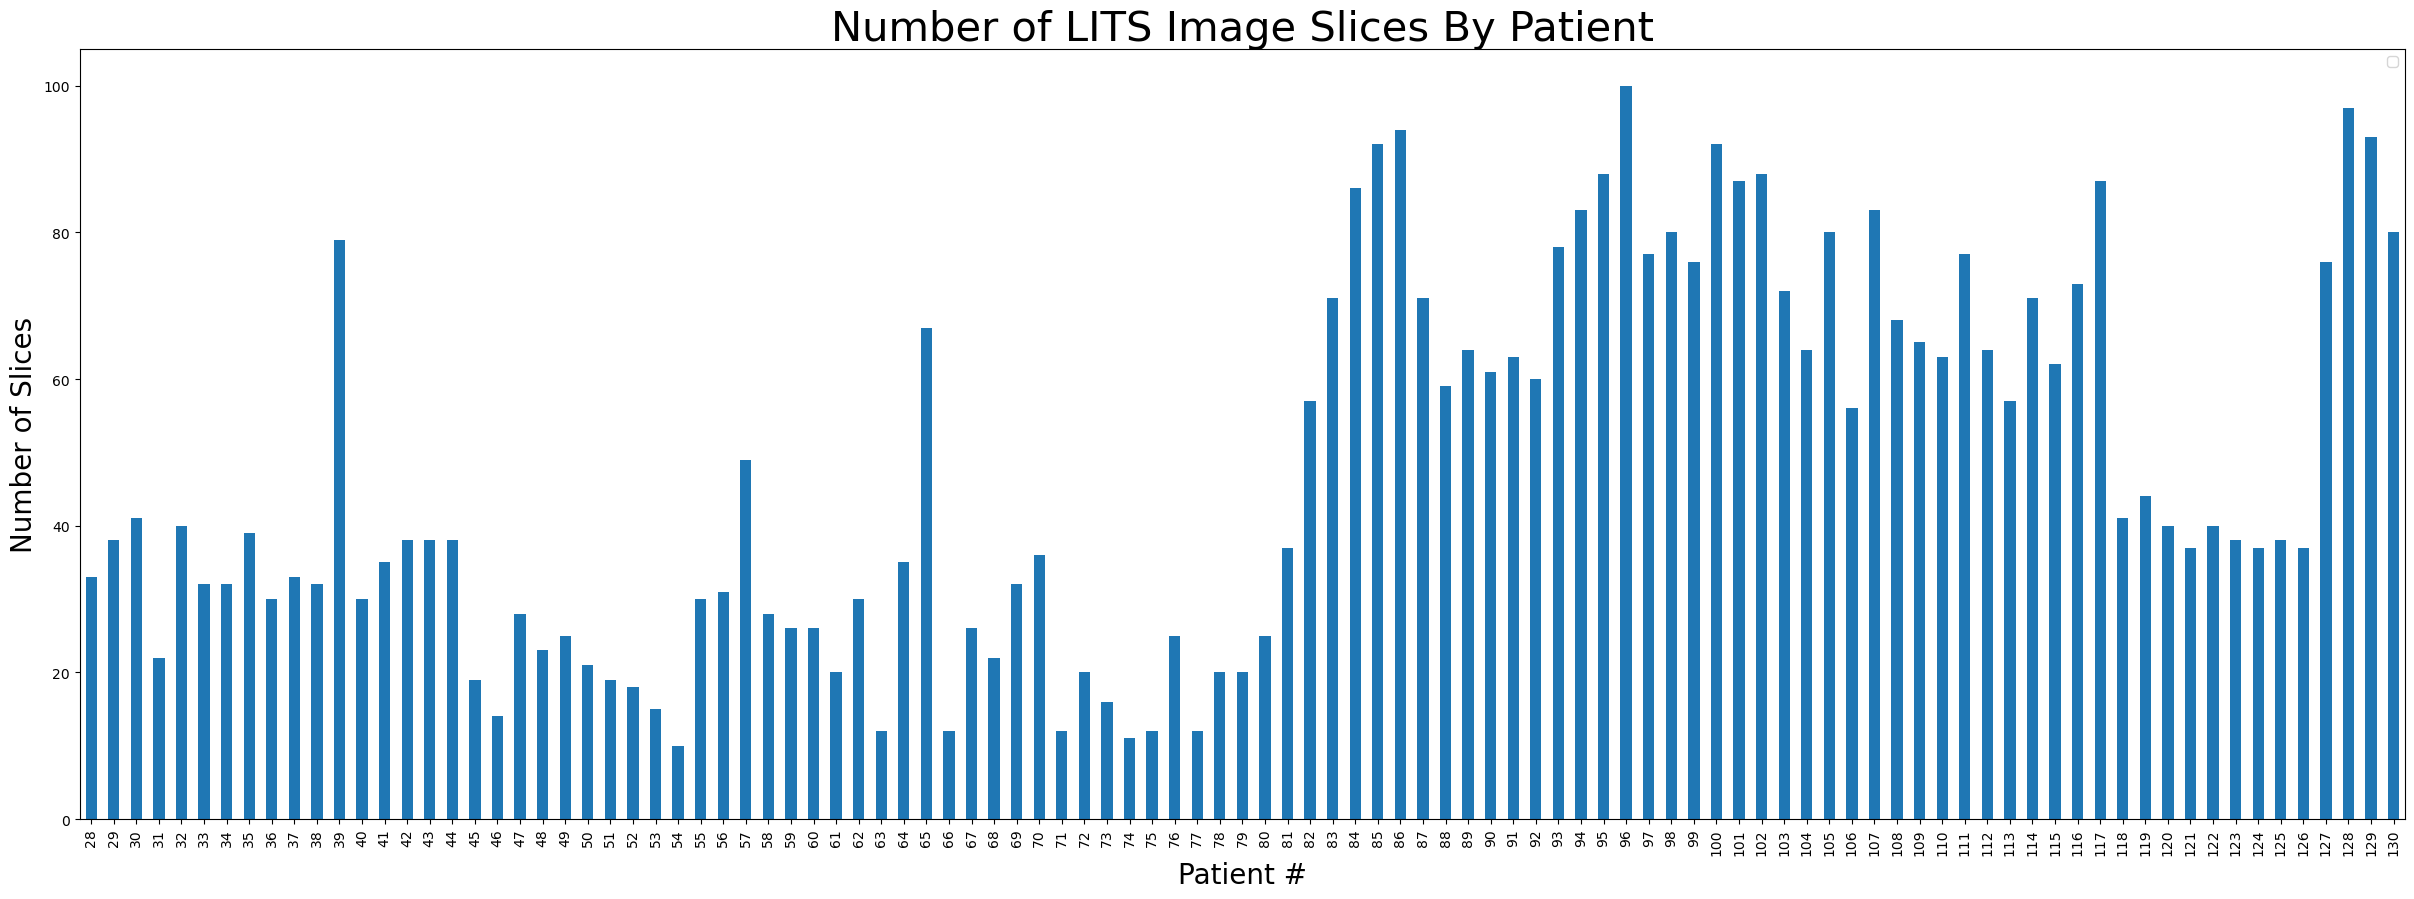

In [6]:


piv.plot(kind='bar', figsize=(30,10))

plt.title("Number of LITS Image Slices By Patient", fontsize=30)
plt.xlabel("Patient #", fontsize=20)
plt.ylabel("Number of Slices", fontsize=20)
plt.legend([])

In [7]:
print(piv.describe().T.to_markdown())

|       |   count |    mean |     std |   min |   25% |   50% |   75% |   max |
|:------|--------:|--------:|--------:|------:|------:|------:|------:|------:|
| slice |     103 | 47.3883 | 25.6577 |    10 |    26 |    38 |    71 |   100 |


|       |   count |    mean |     std |   min |   25% |   50% |   75% |   max |
|:------|--------:|--------:|--------:|------:|------:|------:|------:|------:|
| slice |     103 | 47.3883 | 25.6577 |    10 |    26 |    38 |    71 |   100 |

# Inspect ProstateX Dataset

In [8]:
ret = []
with open('prostate_fold_0.txt', 'r') as data:
    for i in data:
        i = i.removesuffix('.png\n')
        i = i.removesuffix('.png')
        i = i.removeprefix('p')
        ret.append(i.split('slice'))

df = pd.DataFrame(ret, columns=['patient', 'slice'])
df.value_counts('patient')

patient
0075    27
0201    23
0117    23
0027    23
0060    23
0202    21
0154    21
0105    21
0003    21
0086    21
0175    21
0134    21
0041    21
0020    21
0135    19
0177    19
0189    19
0163    19
0193    19
0195    19
0199    19
0185    19
0002    19
0115    19
0083    19
0082    19
0078    19
0063    19
0048    19
0044    19
0035    19
0033    19
0004    19
0090    19
dtype: int64

In [9]:
ret = []
for i in os.listdir('ProstateX/Processed'):
    i = i.removesuffix('.png\n')
    i = i.removesuffix('.png')
    i = i.removeprefix('p')
    ret.append(i.split('slice'))

df_large = pd.DataFrame(ret, columns=['patient', 'slice'])
df_large.value_counts('patient').sort_values()


df_large['patient'] = df_large['patient'].map(lambda x: int(x) if len(x) < 5 else None)
df_large = df_large.dropna(axis=0)

df_large['patient'] = df_large['patient'].map(lambda x: int(x))

#df_large
# df_large['patient'] = df_large['patient'].map(lambda x: int(x))

In [10]:
piv = df_large.iloc[np.argsort(df_large['patient'])[::-1]].pivot_table(values=['slice'], index=['patient'], aggfunc='count')

piv

,slice
patient,
0,19
1,19
2,19
3,21
4,19
...,...
199,19
200,21
201,23


([], [])

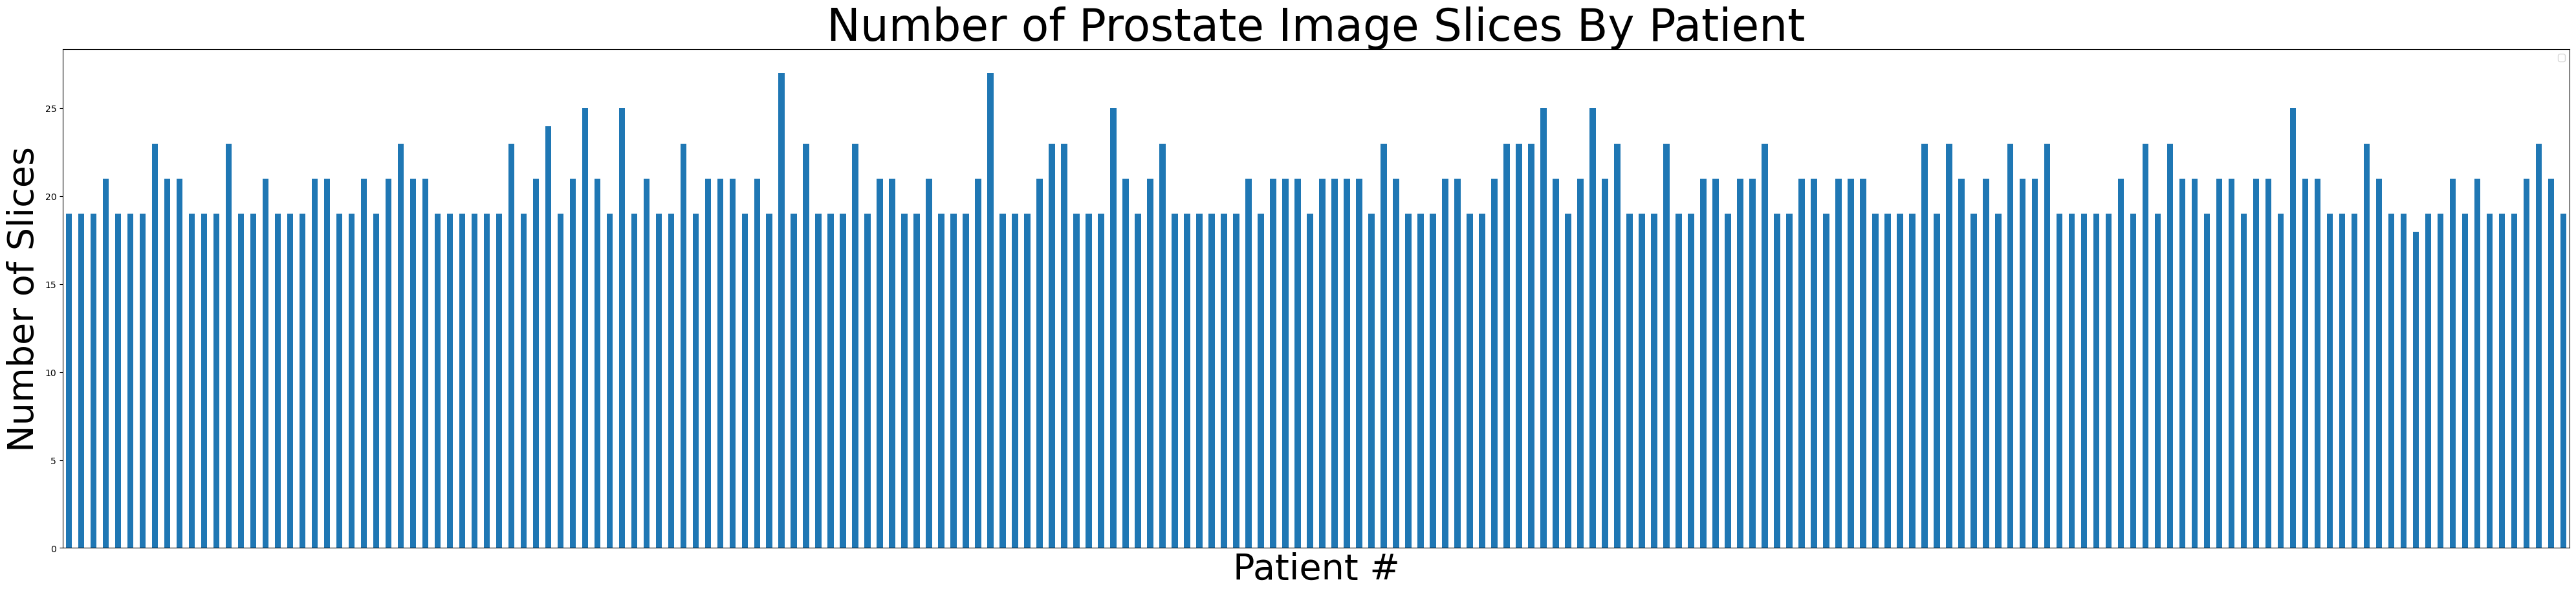

In [11]:
piv.plot(kind='bar', figsize=(50,10))

plt.title("Number of Prostate Image Slices By Patient", fontsize=50)
plt.xlabel("Patient #", fontsize=40)
plt.ylabel("Number of Slices", fontsize=40)
plt.legend([])
plt.xticks([])

In [12]:
print(piv.describe().T.to_markdown())

|       |   count |    mean |    std |   min |   25% |   50% |   75% |   max |
|:------|--------:|--------:|-------:|------:|------:|------:|------:|------:|
| slice |     204 | 20.4216 | 1.7557 |    18 |    19 |    19 |    21 |    27 |


|       |   count |    mean |    std |   min |   25% |   50% |   75% |   max |
|:------|--------:|--------:|-------:|------:|------:|------:|------:|------:|
| slice |     204 | 20.4216 | 1.7557 |    18 |    19 |    19 |    21 |    27 |

# THE

In [13]:
from sklearn.model_selection import train_test_split

lll = 333
train_test_split(np.arange(lll), np.ones(lll))[:2]

[array([ 65,   2,  45, 287, 220, 122, 285,  63, 165, 278, 300, 292, 133,
         82, 210,  38, 128, 155, 152,  72, 215,  50, 150, 227, 305, 156,
        109,  15, 104, 263, 276, 197,  58, 202, 206, 177,  23, 111, 230,
        329,  76, 254,  30,  14, 158, 101,  16, 299, 221, 315, 117, 279,
        320,  90,  55, 103,  98, 291, 176, 114, 110,  87,  81, 247, 123,
        245, 195, 264, 318,  86, 120,  13, 183,  80, 139,  97, 296, 173,
        218, 107,  99, 277, 310, 188, 226, 200, 309, 160, 235, 290, 280,
        269, 145, 211,  22, 229, 262, 302, 147, 143,  25,  75, 231,  27,
        203, 204, 157,  48, 196,  31,  56, 331,  62, 275, 205, 137, 289,
         77, 259, 265,   0, 312,  12, 268,  73, 175, 131, 317, 161, 142,
        192,  17, 184, 174, 208,  34,  19, 118, 303, 134, 266,   9, 319,
         88, 240, 151,  43,  32, 225, 132, 190, 119,  93, 282, 294,   8,
        116,  61,  44, 219, 327, 239, 154, 322, 332,  10, 108, 253, 162,
        314, 216, 213, 193, 138, 301, 293, 105, 325

In [14]:
im = []
mask = []

for n in np.arange(19):
    im.append(imread(rf'/Users/liamjeske/Documents/GitHub/GraphsProject/ProstateX/Processed/p0000slice{n}.png').astype(float))
    mask.append(imread(rf'/Users/liamjeske/Documents/GitHub/GraphsProject/ProstateX/Masks/p0000slice{n}.png').astype(float))


def downsample(img_array, df=20):
    # first, change to 0-1
    if np.max(img_array) > 0:
        img_array = img_array / np.max(img_array)
    return skimage.measure.block_reduce(img_array[:, :], (df, df), np.mean)


def sparse_eigvec(n, k=4):

    a, b = scipy.sparse.linalg.eigs(n, k+ 1, which='SR')

    a = np.real(a)
    b = np.real(b)

    new_data = b[:,1:k+1]
    return new_data


df = 10
n = 8
g = nx.Graph(img_to_graph(downsample(im[n], df)))
nm = nx.normalized_laplacian_matrix(g)

sp = sparse_eigvec(nm,2)
sp

array([[ 5.23431654e-03, -9.19060130e-03],
       [ 5.53947994e-03, -9.69420771e-03],
       [ 6.35283778e-03, -1.10408355e-02],
       ...,
       [ 7.89761362e-03,  8.58527824e-03],
       [ 7.33129355e-03,  8.04803919e-03],
       [-6.33756232e-02, -1.01409281e-13]])

(-0.05, 0.05)

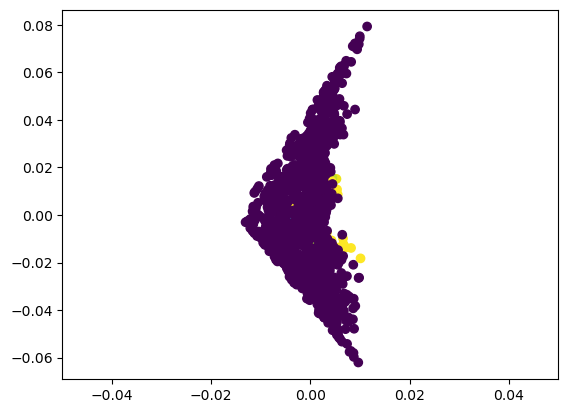

In [15]:
from sklearn.preprocessing import StandardScaler as SS

ss = SS(with_std=False)

plt.scatter(*ss.fit_transform(X=sparse_eigvec(nm,2)).T, c=downsample(mask[n],df).flatten())

plt.xlim(-0.05,0.05)

In [16]:
os.listdir('ProstateX/Processed')

['p0145slice15.png',
 'p0154slice17.png',
 'p0063slice6.png',
 'p0173slice4.png',
 'p0094slice3.png',
 'p0134slice9.png',
 'p0184slice1.png',
 'p0094slice16.png',
 'p0021slice19.png',
 'p0085slice14.png',
 'p0035slice4.png',
 'p0016slice19.png',
 'p0125slice6.png',
 'p0203slice4.png',
 'p0172slice15.png',
 'p0072slice9.png',
 'p0163slice17.png',
 'p0038slice7.png',
 'p0191slice14.png',
 'p0128slice5.png',
 'p0180slice16.png',
 'p0006slice2.png',
 'p0040slice17.png',
 'p0116slice0.png',
 'p0051slice15.png',
 'p0077slice17.png',
 'p0066slice15.png',
 'p0099slice0.png',
 'p0050slice0.png',
 'p0140slice2.png',
 'p0029slice8.png',
 'p0189slice2.png',
 'p0102slice19.png',
 'p0118slice13.png',
 'p0109slice11.png',
 'p0048slice11.png',
 'p0086slice4.png',
 'p0059slice13.png',
 'p0196slice6.png',
 'p0043slice19.png',
 'p0199slice12.png',
 'p0127slice15.png',
 'p0071slice1.png',
 'p0183slice18.png',
 'p0136slice17.png',
 'p0161slice3.png',
 'p0008slice9.png',
 'p0188slice10.png',
 'p0202slice11.

In [17]:
class Spectral:

    def __init__(self, ds, k):
        self.ds = ds
        self.k = k

    def transform(self, im, mask, centered=True):
    #def transform(self, patient_num, centered=True, write=True):
        """Return a downsampled mask along with a spectrally transformed downsampled image 

        Args:
            im (array): input image
            mask (): region of image corresponding to cancer
            centered (bool, optional): if true will preserve the variance of transform but will center about the origin
            write (bool, optional): write to file. Defaults to True.

        Returns:
            returns: centered spectral transform of image
        """
        OG_IM_SHAPE = im.shape
        dim = downsample(im, self.ds)
        dmask = downsample(mask, self.ds)
        g = nx.Graph( img_to_graph(dim) )
        nlm = nx.normalized_laplacian_matrix(g)

        new_data = sparse_eigvec(nlm, self.k)

        if centered:
            ss = SS(with_std=False)
            return dmask, new_data, ss.fit_transform( new_data )
        else:
            return dmask, new_data

In [18]:
npname = os.getcwd() + "/SpectralProstate/downsample10/Mask/"
npname2 = os.getcwd() + "/ProstateX/Masks/"

class ProstateX:

    
    def __init__(self, patient_num, slice_num=None):
        self.patient_num = patient_num
        self.slice_num = slice_num

    def image_path(self):
        #im_string = "p"+"0000"+"slice"+".png"
        diff = len(str(self.patient_num)) - 4

        t = str(self.patient_num)
        t = t.zfill(4)

        return f"ProstateX/Processed/p{t}slice{self.slice_num}.png"
    
    def patient_str(self):
        diff = len(str(self.patient_num)) - 4

        t = str(self.patient_num)
        t = t.zfill(4)
        return f"p{t}"


    def mask_path(self, slice_num):
        #im_string = "p"+"0000"+"slice"+".png"
        diff = len(str(self.patient_num)) - 4
        t = str(self.patient_num)
        t = t.zfill(4)
        return f"ProstateX/Masks/p{t}slice{slice_num}.png"
    
    def image(self):
        return imread(self.image_path())
    
    def mask(self):
        return imread(self.mask_path())
    
    def nonzero_mask_pixel_count(self):
        return self.mask().sum()
    
    def patient_subpaths(self):
        return [x for x in os.listdir('ProstateX/Processed') if x.startswith(self.patient_str()) and \
                imread(npname2 + x).sum() > 0]
    
    def patient_subpaths2(self):
        return [x for x in os.listdir('ProstateX/Processed') if x.startswith(self.patient_str())]

    

    


    

        

pname = "SpectralProstate/downsample10/"

In [19]:
p = ProstateX(patient_num=33,slice_num=7)
p.patient_subpaths()

['p0033slice15.png',
 'p0033slice3.png',
 'p0033slice2.png',
 'p0033slice14.png',
 'p0033slice16.png',
 'p0033slice1.png',
 'p0033slice13.png',
 'p0033slice5.png',
 'p0033slice4.png',
 'p0033slice12.png',
 'p0033slice10.png',
 'p0033slice6.png',
 'p0033slice7.png',
 'p0033slice11.png',
 'p0033slice9.png',
 'p0033slice8.png']

In [20]:
def write_Laplacians_Prostate(ds=7, k=2):
    for xx in np.arange(203):
        Spec = Spectral(ds,k)
        p = ProstateX(patient_num=xx,slice_num=7)
        for i in p.patient_subpaths():
            m = imread("ProstateX/Masks/" + i)
            im = imread("ProstateX/Processed/" + i)
            if(m.sum() > 0):
                dmask, newdata, cennewdata = Spec.transform(im, m)
                ppath = i.removesuffix(".png") + ".txt"
                comm_path = f"SpectralProstate/downsample{Spec.ds}/"

                np.savetxt(comm_path + "Mask/" + ppath, dmask)
                np.savetxt(comm_path + "Processed/" + ppath, newdata)
                np.savetxt(comm_path + "ProcessedCentered/" + ppath, cennewdata)

# write_Laplacians_Prostate()

In [21]:
np.loadtxt("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/ProcessedCentered/p0003slice8.txt")

array([[-0.03155025, -0.02449692],
       [-0.03186508, -0.02485219],
       [-0.03467567, -0.02725801],
       ...,
       [ 0.01088366,  0.01059121],
       [ 0.00909169,  0.00878589],
       [ 0.00287674,  0.00264204]])

In [22]:
p.patient_subpaths()

['p0033slice15.png',
 'p0033slice3.png',
 'p0033slice2.png',
 'p0033slice14.png',
 'p0033slice16.png',
 'p0033slice1.png',
 'p0033slice13.png',
 'p0033slice5.png',
 'p0033slice4.png',
 'p0033slice12.png',
 'p0033slice10.png',
 'p0033slice6.png',
 'p0033slice7.png',
 'p0033slice11.png',
 'p0033slice9.png',
 'p0033slice8.png']

In [23]:
liam = np.arange(202)

p = ProstateX(patient_num=0,slice_num=7)


patient_train, patient_test = train_test_split(liam, train_size=0.8)

ret = []
for i in patient_train:
    p = ProstateX(i)
    ret.append([a.removesuffix('.png') + ".txt" for a in p.patient_subpaths()])

reta = [] 
retb = []
for i in ret:
    for j in i:
        reta.append("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Processed/" +j)
        retb.append("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Mask/" + j)

print(len(reta))

ret = []
for i in patient_test:
    p = ProstateX(i)
    ret.append([a.removesuffix('.png') + ".txt" for a in p.patient_subpaths()])

ret2 = [] 
ret3 = []
for i in ret:
    for j in i:
        ret2.append("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Processed/" +j)
        ret3.append("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Mask/" +j)

print(len(ret2))

2508
661


In [24]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import precision_score as precision, recall_score as recall, jaccard_score as IOU

X_train = np.concatenate([np.loadtxt(i) for i in ret2], 0)
y_train = np.concatenate([np.loadtxt(i).flatten() for i in ret3])

X_test = np.concatenate([np.loadtxt(i) for i in reta], 0)
y_test = np.concatenate([np.loadtxt(i).flatten() for i in retb])

y_train[y_train >= 0.5] = 1
y_train[y_train < 0.5] = 0

#s = SVC(class_weight= 'balanced', verbose=True)
#s.fit(X_train, y_train)

y_test[y_test>= 0.5] = 1
y_test[y_test < 0.5] = 0


k = KNN(1)
k.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [25]:
recall(y_test[:39**2], k.predict(X_test[:39**2])), precision(y_test[:39**2], k.predict(X_test[:39**2]))

(0.1111111111111111, 0.012345679012345678)

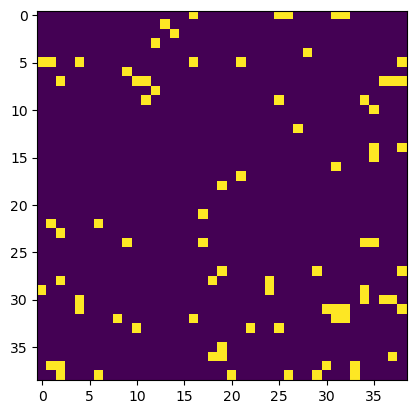

In [26]:
imshow(k.predict(X_test[:39**2]).reshape(39,39))

In [27]:


IOU(y_test, k.predict(X_test))

0.056873972489879375

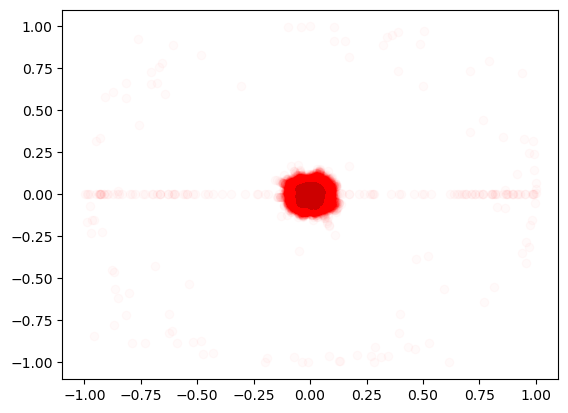

In [28]:
plt.scatter(*X_train[y_train==1].T, alpha=0.9, c='blue')

plt.scatter(*X_train[y_train==0].T, alpha=0.02, c='red')

In [29]:
plt.scatter(*X_train.T)

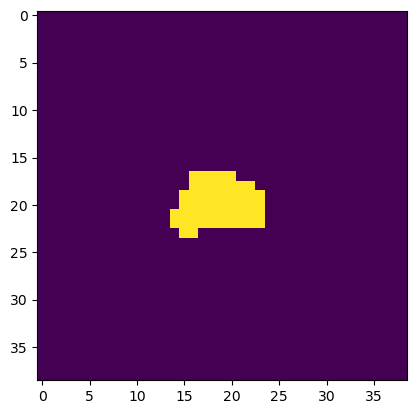

In [ ]:
imshow(y_train[0:39**2].reshape(39,39)) #, reta[0]

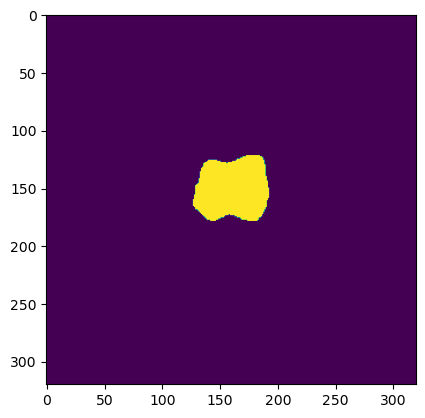

In [ ]:
a = imread("/Users/liamjeske/Documents/GitHub/GraphsProject/ProstateX/Masks/p0203slice7.png")

imshow(a)

imshow(a.flatten().reshape(a.shape))


In [ ]:
np.loadtxt(ret2)

ValueError: could not convert string '/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Processed/p0001slice1 to float64 at row 0, column 1.

In [ ]:
855 / 3271

0.26138795475389787

In [ ]:
np.loadtxt("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Processed/p0182slice13.txt").shape

(1521, 2)

In [ ]:
os.getcwd() + "/SpectralProstate"

'/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate'

In [ ]:
ret2 = [] 
for i in ret:
    for j in i:
        ret2.append(j)

len(ret2)

3075

In [ ]:
aa = img_to_graph(downsample(im[0], 20)).todense()

imshow(aa[aa>0])

: 

: 

(-0.05, 0.05)

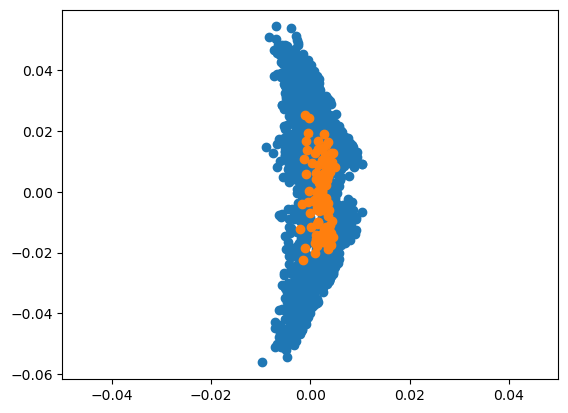

In [ ]:
XX = np.loadtxt("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/ProcessedCentered/p0003slice14.txt")
yy = np.loadtxt("/Users/liamjeske/Documents/GitHub/GraphsProject/SpectralProstate/downsample10/Mask/p0003slice14.txt").flatten()


plt.scatter(*XX[yy==0].T)
plt.scatter(*XX[yy==1].T)
plt.xlim(-0.05, 0.05)